<a href="https://colab.research.google.com/github/ShovonRaul991/Machine_Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understand the data**

# *Goal*

Perform the basic EDA on the data. Understand the data, check on its distribution, visualize the data and check for missing values.

# *Concepts Covered*
As a first step, understand and visualise the data to find its distribution and other statistics. We will use Pandas dataframe methods to understand the data and the seaborn library for plotting the visualizations graphs.

Assume that the dataset is already loaded into the dataframe df and the variable df is available for you to use.
Type in the missing code in the editor to achieve the below objectives.


**Type in the missing code in the editor to achieve the below objectives.
Understand the data.**

Use the shape method of Pandas dataframe to know the no. of rows and columns in the dataset.

**Look into the data.**

Use the head() method of Pandas dataframe to get the feel of the dataset by looking at the first 5 rows.

**Statistical Data Analysis.**

Use the describe() method of Pandas dataframe to know statistical details like min, max,mean, standard deviation and percentiles for the numerical columns.

**Scatter Plot.**

Lets plot scatter plot for Annual_Income against Average_Monthly_Revenue. Use the jointplot method from seaborn library to plot the scatter plot and visually analyze the data and see if the data is linear or not. x is the independent variable Annual_Income, y is the dependent variable Average_Monthly_Revenue and df is the data.There is a positive linear relationship between the variables 'Annual_Income' and 'Average_Monthly_Revenue'.

**Correlation Analysis**

It gives hints to find if variable is significant or not. Use the corr() method of Pandas dataframe and then create a heatmap to visualise it using the heatmap() method.Higher correlation value between the two variables signfies that the two variables are significant to each other.

**Check for missing values**

Use the methods isnull to get missing values and sum to get the count of missing values on all the columns of the dataframe df. Print the same.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Shape: (25, 2)
Peeking into the data
   Annual_Income  Average_Monthly_Revenue
0          98000                127.51673
1          71500                 91.06086
2          49100                  7.84356
3          84000                 96.20609
4          58000                 32.92030
Statistical Data Analysis
       Annual_Income  Average_Monthly_Revenue
count        25.0000                25.000000
mean      86392.0000               112.077798
std       33203.1113                77.190817
min       47700.0000                 7.843560
25%       56700.0000                36.875460
50%       75400.0000                96.206090
75%      106500.0000               164.170350
max      155500.0000               281.842770
AxesSubplot(0.85178,0.0988571;0.0985764x0.725947)
missing values are: 
Annual_Income              0
Average_Monthly_Revenue    0
dtype: int64


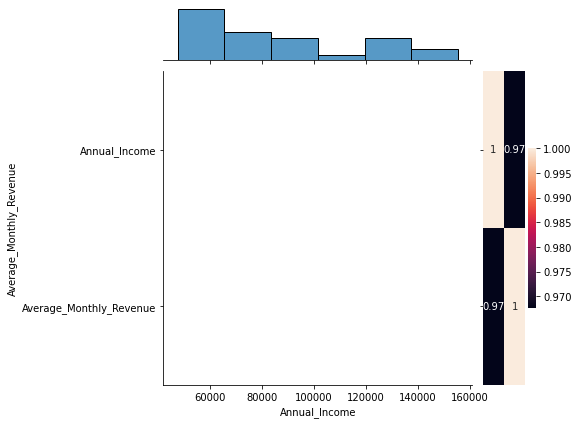

In [19]:
import pandas as pd
import seaborn as sns

path = "/content/drive/MyDrive/Colab Notebooks/Demo.csv"
df = pd.read_csv(path, header=0)
df.describe()

# 1. Summarize data
print(f'Shape: {df.shape}')


# 2. Look into the data.
print('Peeking into the data')
print(df.head())


# 3. Statistical Data Analysis
print('Statistical Data Analysis')
print(df.describe())


# 4. Scatter Plot
print(sns.jointplot(x='Annual_Income', y='Average_Monthly_Revenue', data=df))


#5. Correlation Analysis
corrMatrix = df.corr()
print(sns.heatmap(corrMatrix, annot=True))


#6. Check for missing values
missing_values = df.isnull().sum()
print('missing values are: ')
print(missing_values)

# **Test Train Split**
# Goal
Split the data into Training and Testing Set.

# Concepts Covered
Divide the data into independent variable features (X) and dependent variable (y). Further divide both into Training and Testing datasets.

# **Type in the missing code in the editor to achieve the below objectives.**

### 1.Seperate Data into Dependent and Independent Variables
Seperate the independent variable Annual_Income as a 2D array X. Seperate the dependent variable Average_Monthly_Revenue as y.

### 2.Split into Training and Testing Set

Import the function train_test_split from sklearn library.
To use this function, divide the dataset into 4 - X_train and y_train which will be used for training the model and X_test and y_test which will be used for testing the model.
To the function train_test_split, the first parameter passed is the response variable X, next is the traget variable y, test_size = ratio of test-train split.To split in the ratio of 70:30, select test_size = 0.3, random_state = 0 to get the same training and testing set every time when the code is run.
Print the shape of all 4 - X_train, X_test, y_train, y_test to check the split.

In [20]:
#1. Seperate Data into Dependent and Independent Variables
X = df[['Annual_Income']]
y = df['Average_Monthly_Revenue']


#2. Split into Training and Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)


print(f'Shape of Training Independent variable: {X_train.shape}')
print(f'Shape of Training Dependent variable: {X_test.shape}')
print(f'Shape of Testing Independent variable: {y_train.shape}')
print(f'Shape of Testing Dependent variable: {y_test.shape}')


Shape of Training Independent variable: (17, 1)
Shape of Training Dependent variable: (8, 1)
Shape of Testing Independent variable: (17,)
Shape of Testing Dependent variable: (8,)



# Goal:
**Building Linear Regression Model Using statsmodels.api**

Create the Simple Linear Regression Model Using statsmodels.api Library and fit it using the data.

**Concepts Covered**

Linear Regression is a linear approach for predicting a dependent variable(y) on the basis of an independent variable(X) assuming that X and y are linearly related to each other.

# Type in the missing code in the editor to achieve the below objectives
**Linear Regression Model Using statsmodels.api Library**

*Train the Algorithm*

Import statsmodels.api Library.
1. Invoke the method to ensure that the model fits an intercept

By default, this library does not include the constant term of the linear equation, y = b0 + b1X.To add this constant to the training data, use add_constant method to the independent variable(X_train).We add a constant to get the y-intercept which is not passing through the origin.
2. Build the OLS model on the training data

To create the model object,model_LR use the function OLS on the target variable(y_train) and response variable with constant(X_train_LR) and then fit the model using the method fit.
3. Print the summary statistics of the model on the training data

The summary of the model_LR can be seen by using the created model with summary function - summary.

As the regression equation is y = b0 + b1X, the b0,constant is the const coef value and b1,intercept is the Annual_Income value in the summary. Other attributes like Std error, p-values, R-squared values etc can also be checked from this summary.

*Interpretation of the model Summary*


### 1.R-Squared = 0.87
- reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

### 2.const coefficient = -81.8739
  - is the y-intercept. It means that if both the Annual_Income and Average_Monthly_Revenue coefficients are zero, then the expected output (i.e., the y) would be equal to the const coefficient.

### 3.Annual_Income = 0.0022 
- represents the change in the output y due to a change of one unit in the Annual_Income (everything else held constant)

### 4.std err 
- reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy

### 5.P >|t| = 0.00 
- is the p-value. A p-value of less than 0.05 is considered to be statistically significant

### 6.Confidence Interval 
- represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

In [21]:
#Train the Algorithm
import statsmodels.api as sm


# 1. Use add_constant() method to the X_train or else model will try to fit a
# line that passes through the origin. We add a constant to get the y-intercept
# which is not passing through the origin.
X_train_LR = sm.add_constant(X_train)


# 2. Build the OLS model on the training data
model_LR = sm.OLS(y_train,X_train_LR).fit()


# 3. Print the summary statistics of the model on the training data
print(model_LR.summary())

                               OLS Regression Results                              
Dep. Variable:     Average_Monthly_Revenue   R-squared:                       0.921
Model:                                 OLS   Adj. R-squared:                  0.916
Method:                      Least Squares   F-statistic:                     175.9
Date:                     Wed, 17 Nov 2021   Prob (F-statistic):           1.09e-09
Time:                             06:31:51   Log-Likelihood:                -72.407
No. Observations:                       17   AIC:                             148.8
Df Residuals:                           15   BIC:                             150.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


## Building Linear Regression Model Using sklearn Library
**Goal**

Create the Simple Linear Regression Model Using sklearn Library and fit it using the data.

**Concepts Covered**

scikit-learn is designed for machine-learning, on the other hand statsmodels is made for rigorous statistics. sklearn offers a lot of simple, easy to learn algorithms that require the data to be organized in the right way whereas StatsModels doesn’t have this variety of options, it offers statistics and econometric tools that are top of the line and validated against other statistics software like Stata and R.Before selecting one over the other, it is best to consider the purpose of the model. A model designed for prediction is best fit using scikit-learn, while statsmodels is best employed for explanatory models.

We will use *matplotlib* library for plotting the Regression Line.

##Type in the missing code in the editor to achieve the below objectives.
*Linear Regression Model Using sklearn Library*

**Train the algorithm**

Use class LinearRegression from sklearn.linear_model Library.
1. Create The model object

Create The model object, model_lm by using the method LinearRegression().
2. Fit the model

Fit the model using the created object with method fit on the training variables X_train and y_train.
3. Print the coefficients

To view the coefficient values of the model, print the model attributes model_lm.intercept_, model_lm.coef_.
The co-efficients are the same for both statsmodel and sklearn LR models.
4. Calculating R-Squared for training set

To calculate R-squared value import the class r2_score from library sklearn.metrics.
5. Predict on training set

The model_lm can now be used to predict the values of dependant variable(y) on training data(X_train) using the method predict. These values can be stored and printed in a variable y_pred_train.
6. R square value for Training Set

To calculate the R-squared value of training dataset, Use the method r2_score on actual y_train and predicted y_pred_train values and store it in a variable Rscore_train and print the same.
7. Best Fit Line

Use the scatter() method of matplotlib to plot the scatterplot between Annual_Income and Average_Monthly_Revenue.
Use the plot() method of matplotlibto plot the regression line between actual independent variable X_train and predicted dependent values y_pred_train of the training data.
Again use matplotlib functions to give the title and the x and y labels on the chart.

b0=Constant coefficient: -77.13568491672281
b1=Annual_Income coefficient: [0.00223626]
R-squared value for Training Set:0.9214432624058572


Text(0, 0.5, 'Average_Monthly_Revenue')

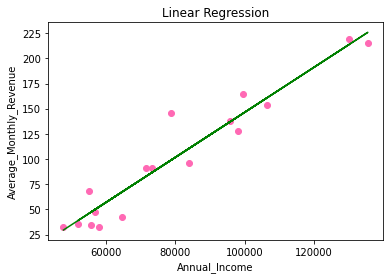

In [22]:
# Train the Algorithm
from sklearn.linear_model import LinearRegression


#1. Create The model object
model_lm = LinearRegression()


#2. Fit the model
model_lm.fit(X_train, y_train)


#3. Print the coefficients
print(f'b0=Constant coefficient: {model_lm.intercept_}')
print(f'b1=Annual_Income coefficient: {model_lm.coef_}')


#4. Calculating R-Squared for training  and testing set
from sklearn.metrics import r2_score


#5. Predict on training set
y_pred_train = model_lm.predict(X_train)


#6. R square value for Training Set
Rscore_train = r2_score(y_train,y_pred_train)
print(f'R-squared value for Training Set:{Rscore_train}')


#7. Best Fit Line
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color = 'hotpink')
plt.plot(X_train,y_pred_train,color = 'green')
plt.title('Linear Regression')
plt.xlabel('Annual_Income')
plt.ylabel('Average_Monthly_Revenue')



## Residual Analysis
**Goal**

*Analyse the Residuals*

### Concepts Covered
The regression has five key assumptions:

*Linear relationship *
- The relationship between the independent and dependent variables to be linear.

*Multivariate normality* 
- All variables to be multivariate normal.
No or little multicollinearity - There is little or no multicollinearity in the data.

*No auto-correlation* 
- There is little or no autocorrelation in the data.

*Homoscedasticity* 
- The residuals are equal across the regression line.
A residual Analysis to find the pattern will be done to know if there is bias in the independent variables. We will use matplotlib library for plotting the residual plots

**Type in the missing code in the editor to achieve the below objectives.**
## Predict the values based on Created Model.
The model_lm can now be used to predict the values of dependant variable(y) on training data(X_train) using the method predict. These values can be stored and printed in a variable y_pred.

## Calculate Residuals
Residuals are the difference between the actual dependent variable y_train and the predicted variable y_pred.

## check if the error terms follow a normal distribution
To check if the residuals calculated follow a normal distribution, create a density plot of the residuals by using the method distplot of sns library. Use matplotlib functions to give the tite and the x and y labels on the chart.

## Scatter Plot to look for patterns in the residuals
Plot the Residual plot which is a scatterplot between independent variable X_train and the calculated residuals with matplotlib function plot. Again use matplotlib functions to give the title and the x and y labels on the chart.

In the plot above, there is no trend of the residuals and hence no bias in the coefficients.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Residual')

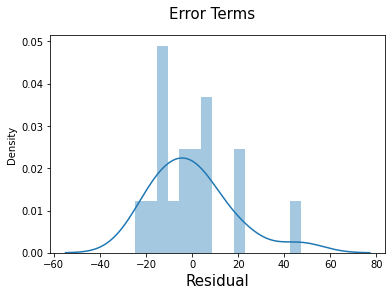

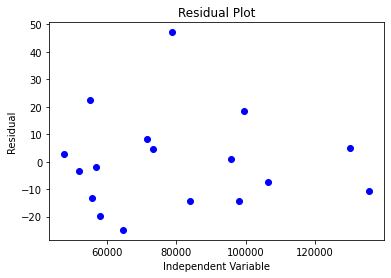

In [23]:
#1. predict y for training set
y_pred = model_lm.predict(X_train)


#2. calculate residuals
residuals = y_train - y_pred


#3. check if the error terms follow a normal distribution
plt.figure()
sns.distplot(residuals, bins = 15)
plt.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('Residual', fontsize = 15)         


#4. Scatter Plot to look for patterns in the residuals
plt.figure()
plt.plot(X_train, residuals, 'o', color='blue')
plt.title('Residual Plot')
plt.xlabel('Independent Variable')
plt.ylabel('Residual')



**Evaluating the Model**

**Goal**

*Evaluate the accuracy of the model*

**Concepts Covered**

R-Squared is used as a metric to quantify how much dependent variable variation the linear model explains.The range of R-Squared goes from 0% to 100%. The higher the R-Squared the better.

In this case, regression line is able to explain 87.75% of the variation, pretty good!

R-squared value for Testing Set:0.9391774140112625


Text(0, 0.5, 'y_pred_test')

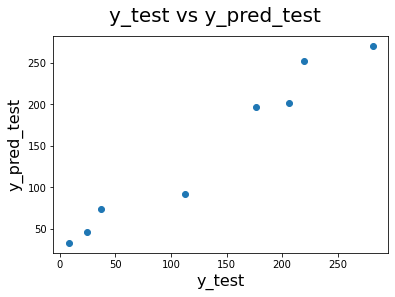

In [24]:
#1. Predict on test set
y_pred_test = model_lm.predict(X_test)


#2. Calculating R-Squared for testing set
from sklearn.metrics import r2_score


#3. R square value for Test Set
Rscore_test = r2_score(y_test,y_pred_test)
print(f'R-squared value for Testing Set:{Rscore_test}')


#4.Plot the actual versus predicted for the test data
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred_test', fontsize=16)
